In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter

# Experiment 1

In [2]:
canDiameter = 4.5 #cm 
canHeight = 11.1
stopperDepth = 0.8
canVolume = np.pi*(canDiameter/2)**2 * (canHeight-stopperDepth)

tubeDiameter = 0.4
tubeLength = 63.0 
tubeOffshoot = 2.5
tubeVolume = np.pi*(tubeDiameter/2)**2 * (tubeLength+tubeOffshoot)

chamberDiameter = 3.25 # +/-0.01


height = np.array([13, 11, 10, 9, 8, 6, 5, 3]) *0.1 #cm
temperature = np.array([44.5, 39.4, 36.6, 33.6, 29.7, 24.7, 21.8, 17.5])

-569.5916631448808 3.3591424934984255


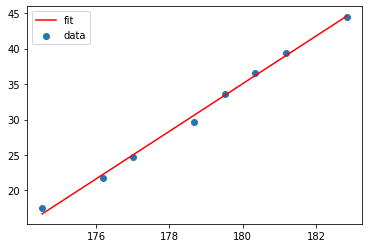

In [3]:
totalVolume = canVolume + tubeVolume + height*np.pi*(chamberDiameter/2)**2

plt.scatter(totalVolume,temperature,label='data')

def f(x, a0, a1):
    return a0 + a1*x

par, cov = fitter.curve_fit(f,totalVolume,temperature)

x = np.linspace(min(totalVolume),max(totalVolume), 50)
plt.plot(x,f(x,par[0],par[1]),color='red',label='fit')
plt.legend();
print(par[0],par[1])

# Experiment 2

In [4]:
pistonMass = 0.0485 # +/- 0.0006 kg
chamberDiameter = 3.25 # +/-0.01 cm

#Rightside up
temperatureU = np.array([47.4, 47.2])
heightU = np.array([[13,12,11,10,8,6,4,2], [14,12,11,10,7,6,4,2]]) #mm
weightU = np.array([[0, 50, 100, 150, 200, 250, 300, 350], [0, 50, 100, 150, 200, 250, 300, 350]]) #+ pistonMass

#Rightside up, oustide bath
tempOU = np.array([22.7, 22.7])
heightOU = np.array([[57, 55, 53, 52, 49],[57, 55, 53, 52, 50]])
weightOU = np.array([[0 , 50, 100, 150, 200], [0 , 50, 100, 150, 200]]) 

#upside down
temperatureD = np.array([5.0, 3.9])
heightD = np.array([[50, 51, 53, 56, 59, 63], [30, 30, 33, 35, 38, 40]])
weightD = np.array([[0, 50, 100, 150, 200, 250], [0, 50, 100, 150, 200, 250]]) + pistonMass

#upside down, outside bath
tempOD = np.array([23.2, 23.2])
heightOD = np.array([[32, 33, 35, 37, 39], [57, 56, 54, 52, 49]])
weightOD = np.array([[0, 50, 100, 150, 200], [0, 50, 100, 150, 200]])

In [5]:
area = np.pi*(chamberDiameter*0.5)**2
g = 9.81

#Getting P and dP
Pressure = []
weight = [weightU, weightD, weightOU, weightOD]

for w in weight:
    F = (w + pistonMass*1e3) * g /1e3 #Newtons
    Pressure.append(F/area) #N/cm^2
    
dP = []
for p in Pressure:
    dP.append(np.diff(p))

#Getting V and dV
Volume = []
height = [heightU,  heightD, heightOU, heightOD]

canDiameter = 4.5 #cm 
canHeight = 11.1
stopperDepth = 0.8
canVolume = np.pi*(canDiameter/2)**2 * (canHeight-stopperDepth)

tubeDiameter = 0.4
tubeLength = 63.0 
tubeOffshoot = 2.5
tubeVolume = np.pi*(tubeDiameter/2)**2 * (tubeLength+tubeOffshoot)

for h in height:
    Volume.append(h/10*area + canVolume+tubeVolume)

dV = []
for v in Volume:
    dV.append((np.diff(v)))
    
#Calculating Ratios
vRatio = []
pRatio = []
count = -1
indexes = []
for index in range(len(Pressure)):
    for j in range(len(Pressure[index])):
        seq = 0
        for k in range(len(dP[index][j])):
            count += 1
            seq += 1
            vRatio.append(dV[index][j][k] / Volume[index][j][k])
            pRatio.append(dP[index][j][k] / Pressure[index][j][k])
        indexes.append([count, seq])
indexes = np.array(indexes)

In [127]:

# min(vRatio[indexes[0, 0]:indexes[1, 0]]), min(vRatio[:indexes[0, 0]])

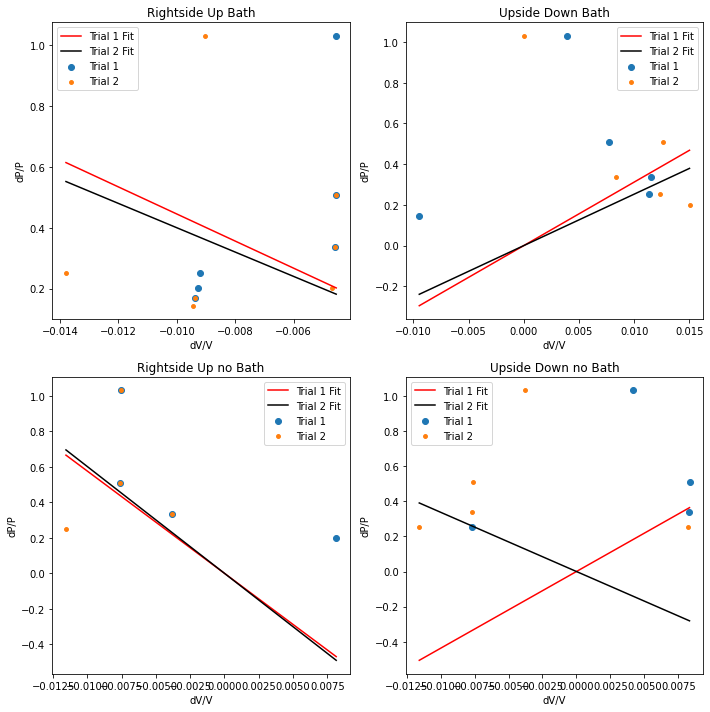

In [8]:
def g(x, a0):
    return -a0*x

fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0][0].scatter(vRatio[:indexes[0, 0]], pRatio[:indexes[0, 0]], label='Trial 1')
ax[0][0].scatter(vRatio[indexes[0, 0]:indexes[1, 0]], pRatio[indexes[0, 0]:indexes[1, 0]], s=15, label='Trial 2')
ax[0][0].set_xlabel('dV/V')
ax[0][0].set_ylabel('dP/P');
ax[0][0].set_title('Rightside Up Bath')


Upar1, Ucov1 = fitter.curve_fit(g, vRatio[:indexes[0, 0]], pRatio[:indexes[0, 0]])
Upar2, Ucov2 = fitter.curve_fit(g, vRatio[indexes[0, 0]:indexes[1, 0]], pRatio[indexes[0, 0]:indexes[1, 0]])

x = np.linspace(min(min(vRatio[indexes[0, 0]:indexes[1, 0]]), min(vRatio[:indexes[0, 0]])),
               max(max(vRatio[indexes[0, 0]:indexes[1, 0]]), max(vRatio[:indexes[0, 0]])),
               100)

ax[0][0].plot(x,g(x,Upar1[0]), color='red', label='Trial 1 Fit')
ax[0][0].plot(x,g(x,Upar2[0]), color='black',label = 'Trial 2 Fit')

ax[0][0].legend();

ax[0][1].scatter(vRatio[indexes[1, 0]:indexes[2, 0]], pRatio[indexes[1, 0]:indexes[2, 0]], label='Trial 1')
ax[0][1].scatter(vRatio[indexes[2, 0]:indexes[3, 0]], pRatio[indexes[2, 0]:indexes[3, 0]], s=15, label='Trial 2')
ax[0][1].set_xlabel('dV/V')
ax[0][1].set_ylabel('dP/P');
ax[0][1].set_title('Upside Down Bath')


Dpar1, Dcov1 = fitter.curve_fit(g, vRatio[indexes[1, 0]:indexes[2, 0]], pRatio[indexes[1, 0]:indexes[2, 0]])
Dpar2, Dcov2 = fitter.curve_fit(g, vRatio[indexes[2, 0]:indexes[3, 0]], pRatio[indexes[2, 0]:indexes[3, 0]])

x = np.linspace(min(vRatio[indexes[1, 0]:indexes[3, 0]]),
               max(vRatio[indexes[1, 0]:indexes[3, 0]]),
               100)

ax[0][1].plot(x,g(x,Dpar1[0]), color='red', label='Trial 1 Fit')
ax[0][1].plot(x,g(x,Dpar2[0]), color='black',label = 'Trial 2 Fit')

ax[0][1].legend()

ax[1][0].scatter(vRatio[indexes[3, 0]:indexes[4, 0]], pRatio[indexes[3, 0]:indexes[4, 0]], label='Trial 1')
ax[1][0].scatter(vRatio[indexes[4, 0]:indexes[5, 0]], pRatio[indexes[4, 0]:indexes[5, 0]], s=15, label='Trial 2')
ax[1][0].set_xlabel('dV/V')
ax[1][0].set_ylabel('dP/P');
ax[1][0].set_title('Rightside Up no Bath')

OUpar1, OUcov1 = fitter.curve_fit(g, vRatio[indexes[3, 0]:indexes[4, 0]], pRatio[indexes[3, 0]:indexes[4, 0]])
OUpar2, OUcov2 = fitter.curve_fit(g, vRatio[indexes[4, 0]:indexes[5, 0]], pRatio[indexes[4, 0]:indexes[5, 0]])

x = np.linspace(min(vRatio[indexes[3, 0]:indexes[5, 0]]),
               max(vRatio[indexes[3, 0]:indexes[5, 0]]),
               100)

ax[1][0].plot(x,g(x,OUpar1[0]), color='red', label='Trial 1 Fit')
ax[1][0].plot(x,g(x,OUpar2[0]), color='black',label = 'Trial 2 Fit')

ax[1][0].legend();

ax[1][1].scatter(vRatio[indexes[5, 0]:indexes[6, 0]], pRatio[indexes[5, 0]:indexes[6, 0]], label='Trial 1')
ax[1][1].scatter(vRatio[indexes[6, 0]:], pRatio[indexes[6, 0]:], s=15, label='Trial 2')
ax[1][1].set_xlabel('dV/V')
ax[1][1].set_ylabel('dP/P');
ax[1][1].set_title('Upside Down no Bath')

ODpar1, ODcov1 = fitter.curve_fit(g, vRatio[indexes[5, 0]:indexes[6, 0]], pRatio[indexes[5, 0]:indexes[6, 0]])
ODpar2, ODcov2 = fitter.curve_fit(g, vRatio[indexes[6, 0]:], pRatio[indexes[6, 0]:])

x = np.linspace(min(vRatio[indexes[5, 0]:]),
               max(vRatio[indexes[5, 0]:]),
               100)

ax[1][1].plot(x,g(x,ODpar1[0]), color='red', label='Trial 1 Fit')
ax[1][1].plot(x,g(x,ODpar2[0]), color='black',label = 'Trial 2 Fit')

ax[1][1].legend();

fig.tight_layout()
#plt.savefig('Exp 2 Original Ratio Plots fitted.png', facecolor='w', format='png', bbox_inches='tight')

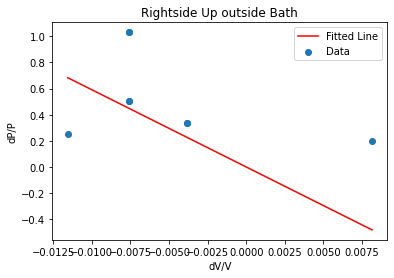

In [9]:
fig,ax = plt.subplots(1,1)
xData = vRatio[indexes[3, 0]:indexes[5, 0]]
yData = pRatio[indexes[3, 0]:indexes[5, 0]]
ax.scatter(xData,yData , label='Data')

ax.set_xlabel('dV/V')
ax.set_ylabel('dP/P');
ax.set_title('Rightside Up outside Bath')
OUpar1, OUcov1 = fitter.curve_fit(g, vRatio[indexes[3, 0]:indexes[5, 0]], pRatio[indexes[3, 0]:indexes[5, 0]])

x = np.linspace(min(vRatio[indexes[3, 0]:indexes[5, 0]]),
               max(vRatio[indexes[3, 0]:indexes[5, 0]]),
               100)

ax.plot(x,g(x,OUpar1[0]), color='red', label='Fitted Line')

ax.legend();
#plt.savefig('Exp 2 Analysis.png', facecolor='w', format='png', bbox_inches='tight')

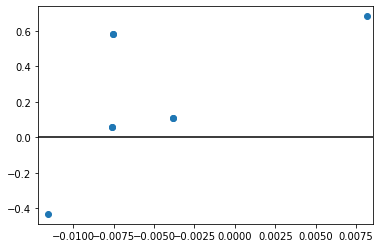

In [10]:
res = []
for i in range(len(yData)):
    
    res.append(yData[i] - g(xData[i],OUpar1[0]))
res = np.array(res)
               
plt.scatter(xData,res)
plt.hlines(y=0,xmin=min(xData)*1.05,xmax=max(xData)*1.05,color='black')
plt.xlim(min(xData)*1.05, max(xData)*1.05);

In [11]:
chamberDiameter = 3.25 # +/-0.01
area = np.pi*(chamberDiameter*0.5)**2
areaErr = np.pi*chamberDiameter*0.01
g = 9.81
#Rightside up, oustide bath
tempOU = np.array([22.7, 22.7])
heightOU = np.array([57, 55, 53, 52, 49, 57, 55, 53, 52, 50])
weightOU = np.array([0 , 50, 100, 150, 200, 0 , 50, 100, 150, 200]) +48.5
weightErr = np.sqrt(0.6**2 + 1)

baseV = 172 #Values from Jason
bVerr = np.sqrt(3.8**2 + 2.1**2)

Volume = []
vErr = []
for h in heightOU:
    t1 = (0.5/10*area)**2
    t2 = (h/10*areaErr)**2
    t3 = bVerr**2
    vErr.append(np.sqrt(t1+t2+t3))
    Volume.append(h/10*area + baseV)

dV = []
dVErr = []
for i in range(1, len(Volume)):
    dV.append(Volume[i] - Volume[i-1])
    dVErr.append(np.sqrt(vErr[i]**2 + vErr[i-1]**2))

dV = np.array(dV)
dVErr = np.array(dVErr)
Volume = np.array(Volume)
vErr = np.array(vErr)

pErr = []
Pressure = []

for w in weightOU:
    F = (w*1e3) * g /1e3 #Newtons
    
    fErr = (weightErr) * g /1e3 #Newtons
    t1 = (fErr/area)**2
    t2 = (F/area**2*areaErr)**2
    pErr.append(np.sqrt(t1+t2)) #N/cm^2
    
    F = (w + pistonMass*1e3) * g /1e3 #Newtons
    Pressure.append(F/area) #N/cm^2
    
dP = []
dPErr = []
for i in range(1,len(Pressure)):
    dP.append(Pressure[i] - Pressure[i-1])
    dPErr.append(np.sqrt(pErr[i]**2 + pErr[i-1]**2))
dP = np.array(dP)
dPErr = np.array(dPErr)
Pressure = np.array(Pressure)
pErr = np.array(pErr)
dP.shape, dPErr.shape, Pressure.shape, pErr.shape

((9,), (9,), (10,), (10,))

In [19]:
yErr = []
for i in range(len(dP)):
    t1 = (dPErr[i] / Pressure[i+1])**2
    t2 = (dP[i] / Pressure[i+1]**2*pErr[i+1])**2
    yErr.append(np.sqrt(t1+t2))
yErr.pop(5)
yErr = np.array(yErr)

xErr = []
for i in range(len(dV)):
    t1 = (dVErr[i] / Volume[i+1])**2
    t2 = (dV[i] / Volume[i+1]**2*vErr[i+1])**2
    xErr.append(np.sqrt(t1+t2))
xErr.pop(5)
xErr = np.array(xErr)

err = np.sqrt((xErr * OUpar1[0])**2 + yErr**2)

reduced_chi_s = np.sum((res/err)**2) / 7
reduced_chi_s

0.00148262358763042

array([ 9.758211  , 11.50570925, 12.62958856, 13.40497836, 34.58098428,
       11.50570925, 12.62958856, 13.4041421 ])

In [15]:

reduced_chi_s = np.sum((res/xErr)**2) / 7
reduced_chi_s

237.32677672692807

Part of the issue with the data is that we don't have a good estimate on the volume contained by the tubing, in order to make a better guess, I'm going to fit backwards, assuming that the data from experiment 1 is otherwise good, I'm going to find the volume that would make our predicted conversion from K to C close to 273.15 which I can do with arbitrary precision

In [114]:
#Finding better Volume
height = np.array([13, 11, 10, 9, 8, 6, 5, 3]) *0.1 #cm
temperature = np.array([44.5, 39.4, 36.6, 33.6, 29.7, 24.7, 21.8, 17.5])

totalVolume = height*np.pi*(chamberDiameter/2)**2

def f(x, a0, a1):
    return a0 + a1*x


center = 0
gap = 10
guess = np.linspace(0,2*(canVolume+tubeVolume),1000)


factor = 0
closest = 1e10
sufficient = False 

while not sufficient:
    
    for i in range(len(guess)):
        par, cov = fitter.curve_fit(f,totalVolume+guess[i],temperature)
        diff = np.abs(273.15 + par[0])
        if diff < closest:
            closest = diff
            index = i
            factor = par[0]
    if closest < 1e-5:
        sufficient = True
    else:
        center = guess[index]
        gap /= 10
        guess = np.linspace(center-gap, center+gap,1000)
print('Difference: {:e}'.format(closest))
print('Fitted Volume: {:.6f}'.format(guess[index]))
print('Kelvin to Celcius Conversion: {:.6f}'.format(factor))

Difference: 1.895436e-07
Fitted Volume: 83.796188
Kelvin to Celcius Conversion: -273.150000


Rerunning Calcs

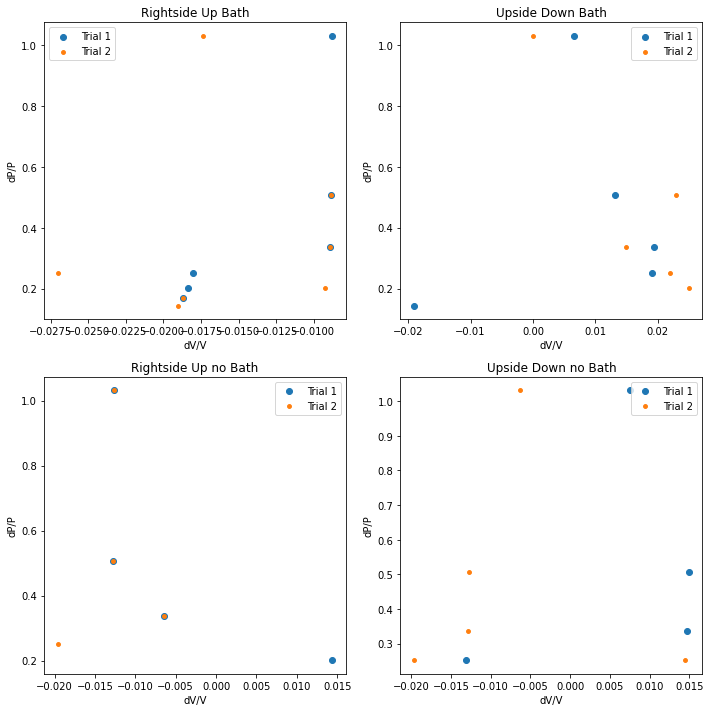

In [119]:
area = np.pi*(chamberDiameter*0.5)**2
g = 9.81

#Getting P and dP
Pressure = []
weight = [weightU, weightD, weightOU, weightOD]

for w in weight:
    F = (w + pistonMass*1e3) * g /1e3 #Newtons
    Pressure.append(F/area) #N/cm^2
    
dP = []
for p in Pressure:
    dP.append(np.diff(p))

#Getting V and dV
Volume = []
height = [heightU,  heightD, heightOU, heightOD]


canDiameter = 4.5 #cm 
canHeight = 11.1
stopperDepth = 0.8
canVolume = np.pi*(canDiameter/2)**2 * (canHeight-stopperDepth)

tubeDiameter = 0.4
tubeLength = 63.0 
tubeOffshoot = 2.5
tubeVolume = np.pi*(tubeDiameter/2)**2 * (tubeLength+tubeOffshoot)

for h in height:
    Volume.append(h/10*area + guess[index])

dV = []
for v in Volume:
    dV.append((np.diff(v)))
    
#Calculating Ratios
vRatio = []
pRatio = []
count = -1
indexes = []
for index in range(len(Pressure)):
    for j in range(len(Pressure[index])):
        seq = 0
        for k in range(len(dP[index][j])):
            count += 1
            seq += 1
            vRatio.append(dV[index][j][k] / Volume[index][j][k])
            pRatio.append(dP[index][j][k] / Pressure[index][j][k])
        indexes.append([count, seq])
indexes = np.array(indexes)



#Plotting
fig, ax = plt.subplots(2,2, figsize = (10,10))

ax[0][0].scatter(vRatio[:indexes[0, 0]], pRatio[:indexes[0, 0]], label='Trial 1')
ax[0][0].scatter(vRatio[indexes[0, 0]:indexes[1, 0]], pRatio[indexes[0, 0]:indexes[1, 0]], s=15, label='Trial 2')

ax[0][0].set_xlabel('dV/V')
ax[0][0].set_ylabel('dP/P');
ax[0][0].set_title('Rightside Up Bath')
ax[0][0].legend();

ax[0][1].scatter(vRatio[indexes[1, 0]:indexes[2, 0]], pRatio[indexes[1, 0]:indexes[2, 0]], label='Trial 1')
ax[0][1].scatter(vRatio[indexes[2, 0]:indexes[3, 0]], pRatio[indexes[2, 0]:indexes[3, 0]], s=15, label='Trial 2')
ax[0][1].set_xlabel('dV/V')
ax[0][1].set_ylabel('dP/P');
ax[0][1].set_title('Upside Down Bath')
ax[0][1].legend();


ax[1][0].scatter(vRatio[indexes[3, 0]:indexes[4, 0]], pRatio[indexes[3, 0]:indexes[4, 0]], label='Trial 1')
ax[1][0].scatter(vRatio[indexes[4, 0]:indexes[5, 0]], pRatio[indexes[4, 0]:indexes[5, 0]], s=15, label='Trial 2')
ax[1][0].set_xlabel('dV/V')
ax[1][0].set_ylabel('dP/P');
ax[1][0].set_title('Rightside Up no Bath')
ax[1][0].legend();

ax[1][1].scatter(vRatio[indexes[5, 0]:indexes[6, 0]], pRatio[indexes[5, 0]:indexes[6, 0]], label='Trial 1')
ax[1][1].scatter(vRatio[indexes[6, 0]:], pRatio[indexes[6, 0]:], s=15, label='Trial 2')
ax[1][1].set_xlabel('dV/V')
ax[1][1].set_ylabel('dP/P');
ax[1][1].set_title('Upside Down no Bath')
ax[1][1].legend();

fig.tight_layout()
plt.savefig('Exp 2 Modified Ratio Plots.png', facecolor='w', format='png', bbox_inches='tight')

It looks more or less the same

# Experiment 3

Measuring leakage of 100g and 150g, taking measurements every 30 seconds

In [9]:
height50.shape, times50.shape

((13,), (13,))

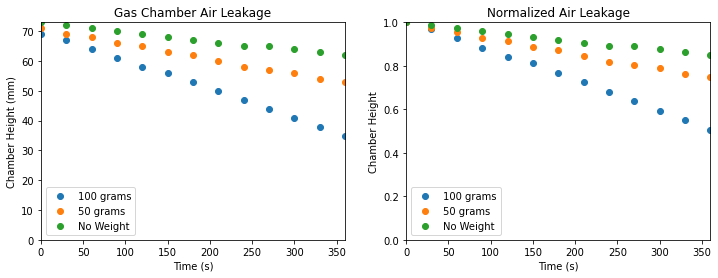

In [6]:
height100 = np.array([69, 67, 64, 61, 58, 56, 53, 50, 47, 44, 41, 38, 35])
times100 = np.arange(0,height100.shape[0]*30,30)

height50 = np.array([71, 69, 68, 66, 65, 63, 62, 60, 58, 57, 56, 54, 53])
times50 = np.arange(0,height50.shape[0]*30,30)

height0 = np.array([73, 72, 71, 70, 69, 68, 67, 66, 65, 65, 64, 63, 62])
times0 = np.arange(0,height0.shape[0]*30,30)


fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(times100,height100,label='100 grams')
ax[0].scatter(times50,height50,label='50 grams')
ax[0].scatter(times0,height0,label='No Weight')
ax[0].set_title('Gas Chamber Air Leakage')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Chamber Height (mm)')
ax[0].legend(loc='lower left');
ax[0].set_xlim(0,np.max(np.concatenate([times100,times50])))
ax[0].set_ylim(0,np.max(np.concatenate([height50, height100, height0])))

ax[1].scatter(times100,height100/np.max(height100),label='100 grams')
ax[1].scatter(times50,height50/np.max(height50),label='50 grams')
ax[1].scatter(times0,height0/np.max(height0),label='No Weight')
ax[1].set_title('Normalized Air Leakage')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Chamber Height')
ax[1].legend(loc='lower left');
ax[1].set_xlim(0,np.max(np.concatenate([times100,times50])))
ax[1].set_ylim(0,1);

In [42]:
pistonMass = 48.5 # +/- 0.6 g
initColdBath = 0 #C
initHotBath = 47.4 #C

temperature50 = np.array([0.1, 47.4, 47.7, 0, 47.3, 47.3, 0.2, 47.5, 47.5, 0.2])
height50 = np.array([30, 56, 57, 26, 26, 47, 47, 16, 14, 40, 41, 10])

temperature100 = np.array([0, 47.2, 47.2, 0.2, 0.2, 47.2, 47.3, 0.1, 0.1, 47.2, 47.2, 0.2])
height100 = np.array([33, 58, 60, 30, 26, 53, 53, 22, 19, 44, 46, 16])

In [45]:
K = 273.15
for i in range(3):
    wO = (height50[i*4+1]- height50[i*4])*(pistonMass + 50)
    wI = (height50[i*4+2]- height50[i*4+3])*(pistonMass)
    net = wO - wI
    print('Cycle', i+1)
    print('Work Out: ', wO, 'g mm')
    print('Work In: ', wI, ' g mm')
    print('Net Work: ', net, 'g mm')
    print('Working Efficiency: ', net/wO)
    print('Carnot Efficiency: ', 1 - (temperature50[i*3]+K)/(temperature50[i*3+1]+K))

Cycle 1
Work Out:  2561.0 g mm
Work In:  1503.5  g mm
Net Work:  1057.5 g mm
Working Efficiency:  0.4129246388129637
Carnot Efficiency:  0.14755888316955224
Cycle 2
Work Out:  2068.5 g mm
Work In:  1503.5  g mm
Net Work:  565.0 g mm
Working Efficiency:  0.27314479091128835
Carnot Efficiency:  0.147604930566391
Cycle 3
Work Out:  2561.0 g mm
Work In:  1503.5  g mm
Net Work:  1057.5 g mm
Working Efficiency:  0.4129246388129637
Carnot Efficiency:  0.1475128644939966


In [44]:
for i in range(3):
    print(temperature50[i*3], temperature50[i*3+1])

0.1 47.4
0.0 47.3
0.2 47.5


In [43]:
temperature50.shape, height50.shape

((10,), (12,))